<p><img src="https://pbs.twimg.com/card_img/1620112841331073031/nIAlo0vh?format=jpg&name=medium"></p> 

## In this data analysis project, we will focus on weather data recorded in Athens, in the year 2017. We will analyze and draw insights from meteorological parameters such as temperature, wind direction, wind speed, to gain a better understanding of the weather patterns in Athens during that year.  

### The analysis will be separated in three parts

<p> 1.Data preparation and cleaning </p>
<p> 2.Exploratory data / visualize  </p>
<p> 3.Predictions using linear regression</p>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
import seaborn as sns

df = pd.DataFrame(pd.read_csv(r'C:/Users/User/OneDrive/Υπολογιστής/PYTHON/weather_data.csv'))
pd.set_option('display.max_columns',None)
df

,MONTH,DAY,TEMP,HIGH,TIME,LOW,TIME.1,HDD,CDD,RAIN,W_SPEED,WINDHIGH,TIME.2,DIR
0,JAN,1,4.4,7.2,15:10,2.6,7:20,13.9,0.0,0.0,4.0,29.0,12:10,N
1,JAN,2,7.2,11.3,14:40,3.1,0:40,11.2,0.0,0.0,2.7,24.1,20:40,W
2,JAN,3,9.6,13.3,14:50,6.6,8:20,8.8,0.0,0.0,4.5,30.6,14:20,SW
3,JAN,4,10.7,14.3,15:20,7.6,3:30,7.7,0.0,0.0,3.2,24.1,14:40,SSW
4,JAN,5,12.2,15.4,13:50,8.7,7:50,6.2,0.0,0.0,7.7,56.3,0:00,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,,27,11.9,15.8,14:30,8.5,8:10,6.4,0.0,0.2,3.9,24.1,22:50,S
361,,28,13.0,14.9,14:10,11.3,2:20,5.3,0.0,6.6,11.4,56.3,18:40,S
362,,29,11.3,14.8,14:40,8.4,5:30,7.1,0.0,15.6,4.8,37.0,13:10,SSW
363,,30,9.9,13.1,13:50,7.8,23:10,8.4,0.0,0.2,3.9,25.7,11:30,SSW


## 1.Data preparation and cleaning 

<p> Some mistakes in months exists and there are 4 missing values , 2 in Hight temperature and 2 in Low. Also some columns have wrond data types. Thus our data are noisy right now. </p>

<p> We will use cubic interpolation in order to replace these missing value. Instead of interpolating all the dataframe we will aproach these NaN values with the 3 before and 3 after values from every missing value, to get a better result. Also we will clean the Month column and the data types from HIGHT and LOW columns</p>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MONTH     365 non-null    object 
 1   DAY       365 non-null    int64  
 2   TEMP      365 non-null    float64
 3   HIGH      365 non-null    object 
 4   TIME      365 non-null    object 
 5   LOW       365 non-null    object 
 6   TIME.1    365 non-null    object 
 7   HDD       365 non-null    float64
 8   CDD       365 non-null    float64
 9   RAIN      365 non-null    float64
 10  W_SPEED   365 non-null    float64
 11  WINDHIGH  365 non-null    float64
 12  TIME.2    365 non-null    object 
 13  DIR       365 non-null    object 
dtypes: float64(6), int64(1), object(7)
memory usage: 40.0+ KB


In [7]:
df.isna().sum() #we can see that we have 4 NaN values

MONTH       0
DAY         0
TEMP        0
HIGH        0
TIME        0
LOW         0
TIME.1      0
HDD         0
CDD         0
RAIN        0
W_SPEED     0
WINDHIGH    0
TIME.2      0
DIR         0
dtype: int64

In [8]:
df['MONTH'] = df['MONTH'].replace({' ' : 'DEC'}, regex=True)
df['MONTH'] = df['MONTH'].replace({'DECDEC' : 'DEC'}, regex=True)
df['MONTH'] = df['MONTH'].replace({'JOU' : 'JUN'}, regex=True)
df['HIGH'] = pd.to_numeric(df['HIGH'],errors = 'coerce')
df['LOW'] = pd.to_numeric(df['LOW'],errors = 'coerce')
df

,MONTH,DAY,TEMP,HIGH,TIME,LOW,TIME.1,HDD,CDD,RAIN,W_SPEED,WINDHIGH,TIME.2,DIR
0,JAN,1,4.4,7.2,15:10,2.6,7:20,13.9,0.0,0.0,4.0,29.0,12:10,N
1,JAN,2,7.2,11.3,14:40,3.1,0:40,11.2,0.0,0.0,2.7,24.1,20:40,W
2,JAN,3,9.6,13.3,14:50,6.6,8:20,8.8,0.0,0.0,4.5,30.6,14:20,SW
3,JAN,4,10.7,14.3,15:20,7.6,3:30,7.7,0.0,0.0,3.2,24.1,14:40,SSW
4,JAN,5,12.2,15.4,13:50,8.7,7:50,6.2,0.0,0.0,7.7,56.3,0:00,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,DEC,27,11.9,15.8,14:30,8.5,8:10,6.4,0.0,0.2,3.9,24.1,22:50,S
361,DEC,28,13.0,14.9,14:10,11.3,2:20,5.3,0.0,6.6,11.4,56.3,18:40,S
362,DEC,29,11.3,14.8,14:40,8.4,5:30,7.1,0.0,15.6,4.8,37.0,13:10,SSW
363,DEC,30,9.9,13.1,13:50,7.8,23:10,8.4,0.0,0.2,3.9,25.7,11:30,SSW


In [9]:
df['HIGH'] = pd.to_numeric(df['HIGH'],errors = 'coerce')
df['LOW'] = pd.to_numeric(df['LOW'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MONTH     365 non-null    object 
 1   DAY       365 non-null    int64  
 2   TEMP      365 non-null    float64
 3   HIGH      363 non-null    float64
 4   TIME      365 non-null    object 
 5   LOW       363 non-null    float64
 6   TIME.1    365 non-null    object 
 7   HDD       365 non-null    float64
 8   CDD       365 non-null    float64
 9   RAIN      365 non-null    float64
 10  W_SPEED   365 non-null    float64
 11  WINDHIGH  365 non-null    float64
 12  TIME.2    365 non-null    object 
 13  DIR       365 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 40.0+ KB


In [10]:
nan1=df.iloc[14:21,3].interpolate(method='cubic')
print(nan1)
nan2=df.iloc[58:65,3].interpolate(method='cubic')
print(nan2)
nan3=df.iloc[52:59,5].interpolate(method='cubic')
print(nan3)
nan4=df.iloc[100:107,5].interpolate(method='cubic')
print(nan4)
df.iloc[14:21,3]=nan1
df.iloc[58:65,3]=nan2
df.iloc[52:59,5]=nan3
df.iloc[100:107,5]=nan4

14    12.700000
15    12.300000
16    12.500000
17    13.915625
18    12.900000
19     7.800000
20     9.200000
Name: HIGH, dtype: float64
58    18.10
59    18.30
60    15.40
61    15.95
62    18.20
63    19.00
64    17.90
Name: HIGH, dtype: float64
52     7.900
53     9.200
54    11.000
55    12.075
56    11.600
57     9.600
58     9.100
Name: LOW, dtype: float64
100    11.20000
101    11.40000
102    12.20000
103    13.11875
104    13.40000
105    12.60000
106    11.80000
Name: LOW, dtype: float64


In [7]:
df["HIGH"].max()

42.1

In [9]:
df["LOW"].min()

-2.9

In [10]:
df["WINDHIGH"].max()

64.4

In [11]:
df["RAIN"].sum()

617.8

In [12]:
df["HDD"].sum()

1318.4

In [13]:
df["CDD"].sum()

1056.2

In [50]:
df["TEMP"].mean()

17.615890410958887

#### we will append the DataFrame with a new row that calculates the mean from TEMP, max from HIGH, min from LOW , the sum from HDD, CDD, RAIN ( HDD Heating Degree Days, (CDD Cooling Degree Days) and the max from the highest wind speed

In [11]:
new_rowdf=pd.DataFrame({"MONTH":[''],
                       "DAY":[''],
                       "TEMP":[df["TEMP"].mean()],
                       "HIGH":[df["HIGH"].max()],
                       "TIME":[''],
                       "LOW":[df["LOW"].min()],
                       "TIME.1":[''],
                       "HDD":[df["HDD"].sum()],
                       "CDD":[df["CDD"].sum()],
                       "RAIN":[df["RAIN"].sum()],
                       "W_SPEED":[''],
                       "WINDHIGH":[df["WINDHIGH"].max()],
                       "TIME.2":[''],
                       "DIR":['']})
new_rowdf

,MONTH,DAY,TEMP,HIGH,TIME,LOW,TIME.1,HDD,CDD,RAIN,W_SPEED,WINDHIGH,TIME.2,DIR
0,,,17.61589,42.1,,-2.9,,1318.4,1056.2,617.8,,64.4,,


In [12]:
df2=df.append(new_rowdf, ignore_index=False, verify_integrity=False, sort='365')
df2

C:\Users\User\AppData\Local\Temp\ipykernel_14272\1715211546.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df.append(new_rowdf, ignore_index=False, verify_integrity=False, sort='365')
C:\Users\User\AppData\Local\Temp\ipykernel_14272\1715211546.py:1: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df2=df.append(new_rowdf, ignore_index=False, verify_integrity=False, sort='365')


,CDD,DAY,DIR,HDD,HIGH,LOW,MONTH,RAIN,TEMP,TIME,TIME.1,TIME.2,WINDHIGH,W_SPEED
0,0.0,1,N,13.9,7.2,2.6,JAN,0.0,4.40000,15:10,7:20,12:10,29.0,4.0
1,0.0,2,W,11.2,11.3,3.1,JAN,0.0,7.20000,14:40,0:40,20:40,24.1,2.7
2,0.0,3,SW,8.8,13.3,6.6,JAN,0.0,9.60000,14:50,8:20,14:20,30.6,4.5
3,0.0,4,SSW,7.7,14.3,7.6,JAN,0.0,10.70000,15:20,3:30,14:40,24.1,3.2
4,0.0,5,S,6.2,15.4,8.7,JAN,0.0,12.20000,13:50,7:50,0:00,56.3,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.0,28,S,5.3,14.9,11.3,DEC,6.6,13.00000,14:10,2:20,18:40,56.3,11.4
362,0.0,29,SSW,7.1,14.8,8.4,DEC,15.6,11.30000,14:40,5:30,13:10,37.0,4.8
363,0.0,30,SSW,8.4,13.1,7.8,DEC,0.2,9.90000,13:50,23:10,11:30,25.7,3.9
364,0.0,31,WNW,9.4,12.6,6.9,DEC,0.0,8.90000,14:20,4:50,10:00,25.7,4.3


In [13]:
# we will reshape the columns in their original order
cols = df2.columns.tolist()
cols=['MONTH','DAY','TEMP','HIGH','TIME','LOW','TIME.1','HDD','CDD','RAIN','W_SPEED','WINDHIGH','TIME.2','DIR']
cols

['MONTH',
 'DAY',
 'TEMP',
 'HIGH',
 'TIME',
 'LOW',
 'TIME.1',
 'HDD',
 'CDD',
 'RAIN',
 'W_SPEED',
 'WINDHIGH',
 'TIME.2',
 'DIR']

In [14]:
df2=df2[cols]
df2

,MONTH,DAY,TEMP,HIGH,TIME,LOW,TIME.1,HDD,CDD,RAIN,W_SPEED,WINDHIGH,TIME.2,DIR
0,JAN,1,4.40000,7.2,15:10,2.6,7:20,13.9,0.0,0.0,4.0,29.0,12:10,N
1,JAN,2,7.20000,11.3,14:40,3.1,0:40,11.2,0.0,0.0,2.7,24.1,20:40,W
2,JAN,3,9.60000,13.3,14:50,6.6,8:20,8.8,0.0,0.0,4.5,30.6,14:20,SW
3,JAN,4,10.70000,14.3,15:20,7.6,3:30,7.7,0.0,0.0,3.2,24.1,14:40,SSW
4,JAN,5,12.20000,15.4,13:50,8.7,7:50,6.2,0.0,0.0,7.7,56.3,0:00,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,DEC,28,13.00000,14.9,14:10,11.3,2:20,5.3,0.0,6.6,11.4,56.3,18:40,S
362,DEC,29,11.30000,14.8,14:40,8.4,5:30,7.1,0.0,15.6,4.8,37.0,13:10,SSW
363,DEC,30,9.90000,13.1,13:50,7.8,23:10,8.4,0.0,0.2,3.9,25.7,11:30,SSW
364,DEC,31,8.90000,12.6,14:20,6.9,4:50,9.4,0.0,0.0,4.3,25.7,10:00,WNW


In [15]:
# No differences in data types
df2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 0
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MONTH     366 non-null    object 
 1   DAY       366 non-null    object 
 2   TEMP      366 non-null    float64
 3   HIGH      366 non-null    float64
 4   TIME      366 non-null    object 
 5   LOW       366 non-null    float64
 6   TIME.1    366 non-null    object 
 7   HDD       366 non-null    float64
 8   CDD       366 non-null    float64
 9   RAIN      366 non-null    float64
 10  W_SPEED   366 non-null    object 
 11  WINDHIGH  366 non-null    float64
 12  TIME.2    366 non-null    object 
 13  DIR       366 non-null    object 
dtypes: float64(7), object(7)
memory usage: 42.9+ KB


## Exploratory data and visualization 

####  Mean and Standard Deviation for Temperature

In [16]:
print("The mean is: ",df['TEMP'].median())
print("The standard deviation is : ",df['TEMP'].std())

The mean is:  16.8
The standard deviation is :  7.415421974835979


####  How many days the wind blew from each of the addresses?

In [17]:
dir=df2.groupby('DIR')['DAY'].count()
dir

DIR
         1
E        5
ENE      2
ESE     15
N      103
NE       4
NNW      9
NW      14
S       31
SE      65
SSE     11
SSW     22
SW      28
W       19
WNW     20
WSW     17
Name: DAY, dtype: int64

In [18]:
new_dir=pd.DataFrame(dir)
new_dir.reset_index(inplace=True)
new_dir = new_dir.drop(0)
new_dir['DAY'] = new_dir['DAY'].astype('int')
new_dir

,DIR,DAY
1,E,5
2,ENE,2
3,ESE,15
4,N,103
5,NE,4
6,NNW,9
7,NW,14
8,S,31
9,SE,65
10,SSE,11


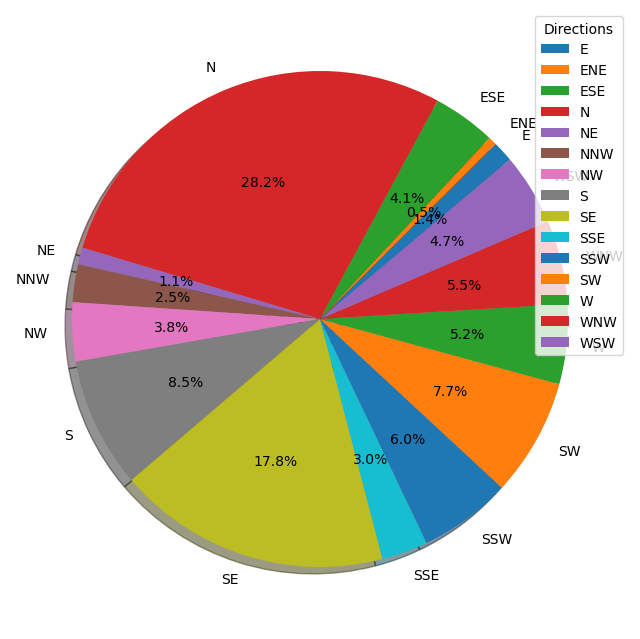

In [20]:
# This pie chart represents the distribution of the days in wind direction. 

plt.figure(figsize=(8,10))
plt.pie(new_dir['DAY'],labels=new_dir['DIR'],shadow=True,autopct='%1.1f%%',startangle=40)
plt.legend(title='Directions')
plt.show()

### The time with most maximum temperatures and the time with most minimum temperatures in the year.

In [21]:
high_hour= pd.DataFrame({"HIGH":df['HIGH'], "TIME": df['TIME'],"TIME.1": df['TIME.1'],"TIME.2": df['TIME.2']})
high_hour=high_hour.sort_values(by="HIGH",ascending=False)
high_hour.head()

,HIGH,TIME,TIME.1,TIME.2
180,42.1,16:40,4:50,16:40
182,41.7,16:30,6:30,17:10
181,40.1,13:40,4:20,15:00
179,37.4,16:20,5:50,18:50
260,37.3,16:10,3:10,13:00


In [22]:
low_hour = pd.DataFrame({"LOW":df['LOW'], "TIME": df['TIME'],"TIME.1": df['TIME.1'],"TIME.2": df['TIME.2']})
low_hour=low_hour.sort_values(by="LOW",ascending=True)
low_hour.head()

,LOW,TIME,TIME.1,TIME.2
8,-2.9,13:20,6:00,16:20
7,-2.5,13:00,6:10,4:40
9,-1.6,21:00,1:10,13:50
6,-1.3,0:10,0:00,18:20
27,1.1,14:50,2:10,12:00


In [26]:
print("The maximum high temperature observed at: ",high_hour.iloc[0,1]) 
print("The minimum temperature observed at", low_hour.iloc[0,1] ,"noon")

The maximum high temperature observed at:  16:40
The minimum temperature observed at 13:20 noon


###  The day with the largest range in variation - changes in temperature

In [28]:
High_temp=df.loc[df['TEMP'] > 30]
df.sort_values(by='TEMP', ascending =False)
print(High_temp.head(5))
print("The day with the largest temperature range variation is shown in the table above, \
with the temperature varying between ", High_temp.iloc[1,5], "to", High_temp.iloc[1,2], "and",
High_temp.iloc[1,3],"Celsius degrees ")

    MONTH  DAY  TEMP  HIGH   TIME   LOW TIME.1  HDD   CDD  RAIN  W_SPEED  \
179   JUN   29  31.4  37.4  16:20  25.6   5:50  0.0  13.1   0.0      3.9   
180   JUN   30  34.3  42.1  16:40  27.2   4:50  0.0  15.7   0.0      4.8   
181   JUL    1  35.6  40.1  13:40  30.8   4:20  0.0  17.2   0.0      4.8   
182   JUL    2  35.9  41.7  16:30  31.1   6:30  0.0  17.6   0.0      4.5   
190   JUL   10  30.2  33.6  16:20  27.2   4:30  0.0  11.8   0.0      7.7   

     WINDHIGH TIME.2  DIR  
179      20.9  18:50  WNW  
180      30.6  16:40   SW  
181      24.1  15:00   SE  
182      27.4  17:10   SW  
190      38.6   9:30   NE  
The day with the largest temperature range variation is shown in the table above, with the temperature varying between  27.2 to 34.3 and 42.1 Celsius degrees 


### From which direction did it blow most days of the year? 

In [29]:
wind_dir=pd.DataFrame(df.groupby('DIR')['DAY'].count())
wind_dir.reset_index(inplace=True)
print(wind_dir)
wind_dir=wind_dir.loc[wind_dir['DAY'] ==wind_dir['DAY'].max()]
print("The direction that blew most \ndays of the year was from the North: ")
print(wind_dir)

    DIR  DAY
0     E    5
1   ENE    2
2   ESE   15
3     N  103
4    NE    4
5   NNW    9
6    NW   14
7     S   31
8    SE   65
9   SSE   11
10  SSW   22
11   SW   28
12    W   19
13  WNW   20
14  WSW   17
The direction that blew most 
days of the year was from the North: 
  DIR  DAY
3   N  103


### The day with the highest wind speed

In [31]:
max_wind_speed=df.groupby('DIR')['W_SPEED'].max()
max_wind_speed=df.loc[df['W_SPEED'] ==df['W_SPEED'].max()]
print(" The day with the highest wind speed was North (N)")
max_wind_speed[['W_SPEED','DIR']]

 The day with the highest wind speed was North (N)


,W_SPEED,DIR
89,15.8,N


### What was the average temperature for each wind direction?

In [41]:
newdf=df.groupby(['DIR']).mean()
newdf.reset_index(inplace=True)
newdf=pd.DataFrame().assign(DIR=newdf['DIR'], TEMP=newdf['TEMP'])
newdf

,DIR,TEMP
0,E,15.040000
1,ENE,13.000000
2,ESE,16.266667
3,N,18.579612
4,NE,15.050000
5,NNW,18.588889
6,NW,11.864286
7,S,15.945161
8,SE,18.989231
9,SSE,19.063636


In [56]:
sort_newdf=newdf.sort_values("TEMP")
sort_newdf

,DIR,TEMP
6,NW,11.864286
1,ENE,13.000000
0,E,15.040000
4,NE,15.050000
10,SSW,15.613636
7,S,15.945161
12,W,16.026316
14,WSW,16.041176
2,ESE,16.266667
13,WNW,16.460000


### The winds addresses with the highest and lowest average temperature.

In [57]:
avg_temps = ['Lowest','Highest']
sort_newdf=sort_newdf.drop(sort_newdf.index[1:14])
sort_newdf['avg_temps']=avg_temps
sort_newdf

,DIR,TEMP,avg_temps
6,NW,11.864286,Lowest
11,SW,21.039286,Highest


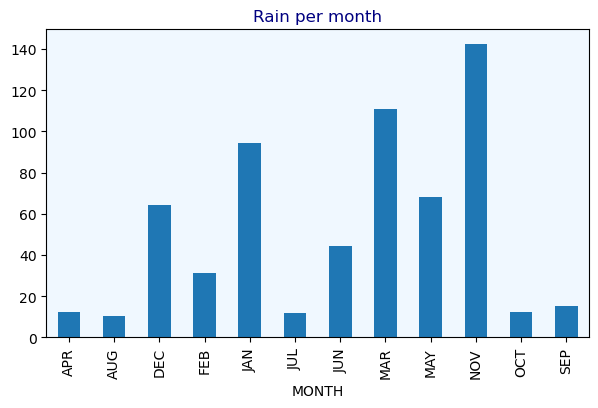

In [62]:
month_plot=df.groupby(['MONTH']).sum()
plt.figure(figsize=(7,4))
month_plot['RAIN'].plot(kind='bar', x='MONTH', y='RAIN')
plt.title(label="Rain per month",color="navy")
plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'AliceBlue'})
plt.show()

### Each visualization represents a season ( days versus temperatures )where the temperatures are visualized with colored lines. High with red , low with blue and temp with green.

In [63]:
winter = df[df['MONTH'].isin(['DEC', 'JAN', 'FEB'])].reset_index(drop=True)

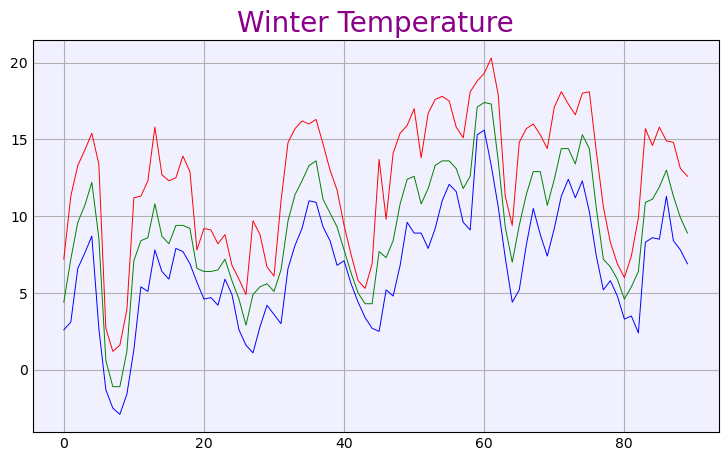

In [64]:
plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'#F0F0FF'})
plt.style.use('_mpl-gallery')
plt.figure(figsize=(7,4))
plt.title(label="Winter Temperature",fontsize=20,color="DarkMagenta")
plt.plot(winter['HIGH'],'r',winter['LOW'],'b',winter['TEMP'],'g',linewidth=0.7)

In [65]:
spring = df[df['MONTH'].isin(['MAR', 'APR', 'MAY'])].reset_index(drop=True)

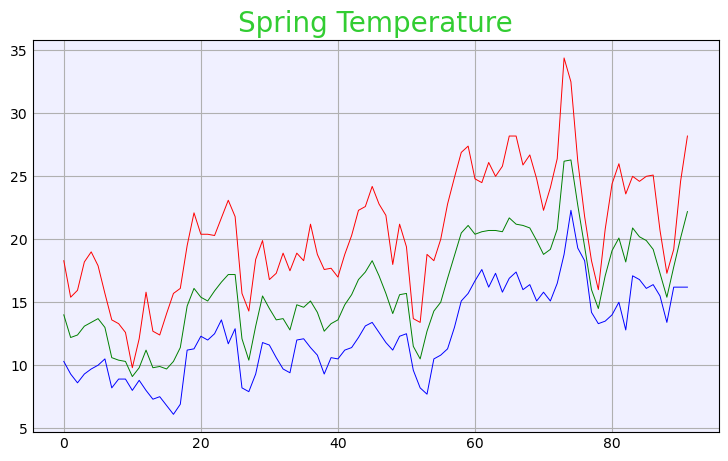

In [66]:
plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'#F0F0FF'})
plt.style.use('_mpl-gallery')
plt.figure(figsize=(7,4))
plt.title(label="Spring Temperature",fontsize=20,color="LimeGreen")
plt.plot(spring['HIGH'],'r',spring['LOW'],'b',spring['TEMP'],'g',linewidth=0.7)

In [67]:
summer = df[df['MONTH'].isin(['JUN', 'JUL', 'AUG'])].reset_index(drop=True)

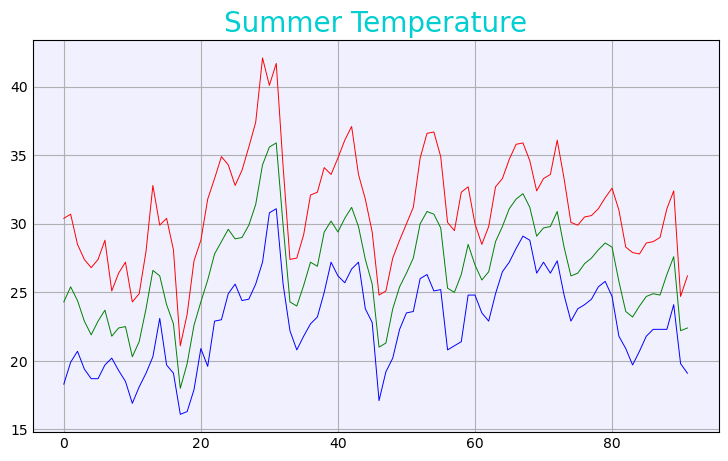

In [68]:
plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'#F0F0FF'})
plt.style.use('_mpl-gallery')
plt.figure(figsize=(7,4))
plt.title(label="Summer Temperature",fontsize=20,color="DarkTurquoise")
plt.plot(summer['HIGH'],'r',summer['LOW'],'b',summer['TEMP'],'g',linewidth=0.7)

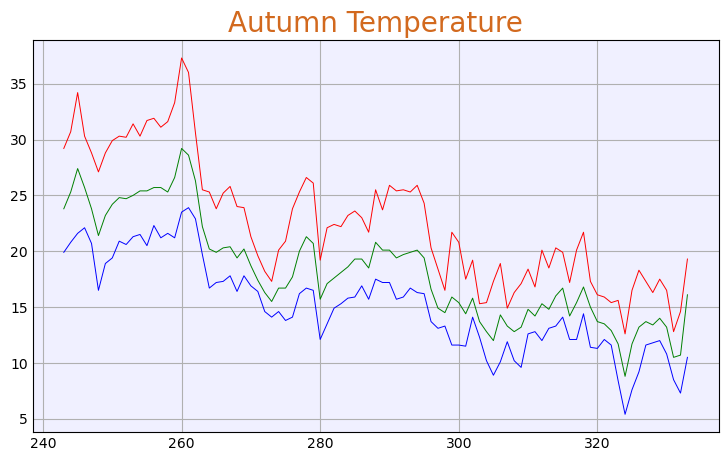

In [69]:
# creating the autumn season
autumn= df.iloc[243:244+90]

plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'#F0F0FF'})
plt.style.use('_mpl-gallery') 
plt.figure(figsize=(7,4))
plt.title(label="Autumn Temperature",fontsize=20,color="Chocolate")
plt.plot(autumn['HIGH'],'r',autumn['LOW'],'b',autumn['TEMP'],'g',linewidth=0.7)

##  Prediction with linear regression


#### We will use linear regression for the temperatures of the december in order to predict the temperature at 25 / 12 for the next year

In [73]:
x=25 # the day we want to predict

dec=df[df['MONTH'] == 'DEC']
xy=np.multiply(dec['DAY'],dec['TEMP'])
sx=dec['DAY'].sum()
sy=dec['TEMP'].sum()
sxy=xy.sum()
mx=dec['DAY'].mean()
my=dec['TEMP'].mean()
x2=np.multiply(dec['DAY'],dec['DAY'])
sx2=np.sum(x2)
n=len(dec['DAY'])

In [74]:
b=(n*sxy-sx*sy)/(n*sx2-sx**2)
a=my-b*mx
print(a,b)

14.081290322580639 -0.18048387096774163


In [75]:
Y = a + b*x
print("the temperature at 25/12/2018 is expected to be: " , round(Y, 2))

the temperature at 25/12/2018 is expected to be:  9.57


In [76]:
ab=np.polyfit(dec['DAY'],dec['TEMP'],deg=1)
ab

array([-0.18048387, 14.08129032])

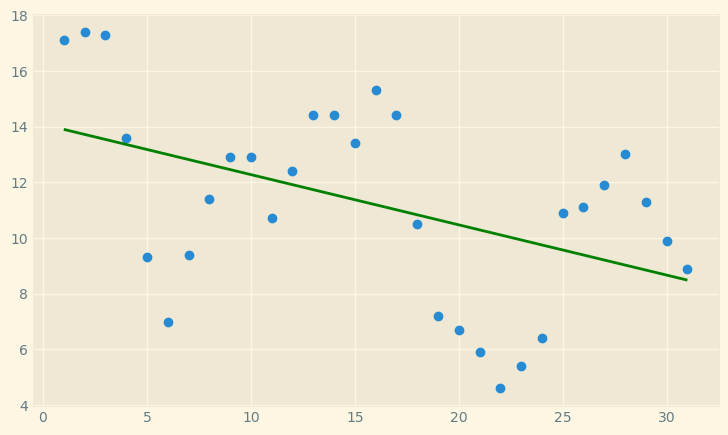

In [77]:
with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(7,4))
    line=np.polyval(ab,dec['DAY'])
    plt.scatter(x=dec['DAY'], y=dec['TEMP'])
    plt.plot(dec['DAY'],line,'g')

#### Rain status for the 2017 year 

In [71]:
def weather(n):
    #this function gets as an argument the sum of the column rain and returns a message about the rain status
    if n<400:
        print("lack of rain")
    elif n>=400 and n<600:
        print("Satisfactory amounts of rain")
    else:
        print("heavy precipitation")
        
weather(df2.iloc[365,-5])

heavy precipitation
